# Detailed Work Plan

## 1. Research Objectives
**Primary Goal**: Analyze hospital patient pathways (https://data.4tu.nl/articles/_/12716513/1 BPI Challenge 2011) using process mining techniques enriched with context-aware variant analysis and customized evaluation metrics.
Sub-Objectives:

* Discover baseline hospital care pathways using standard process mining techniques.
* Implement variant-aware analysis by segmenting patients based on demographic and clinical features.
* Develop and apply a custom generalization metric that accounts for trace importance, following a methodology inspired by weighted fitness calculation.
* Analyze how model completeness and generalization vary between different sampling or segmentation strategies.

## 2. Research Questions
* How well can standard process mining techniques capture real hospital patient pathways?
* How does the inclusion of context-based variant evaluation improve the interpretability of hospital processes?
* How effective is the custom generalization metric in evaluating the robustness and reliability of process models?
* What improvements to hospital operations can be suggested based on the findings?

## 3. Evaluation Metrics

1) Contextual Fitness --  Standard fitness adjusted with variant-level importance. <br>
2) Custom Generalization -- New metric measuring model generalization with consideration of variant significance. <br>
3) Precision -- How much the model avoids overgeneralizing behaviors not present in the data. <br>
4) Completeness -- How well the log covers the actual hospital care process (via entropy or coverage-based estimators). <br>
5) Statistical significance — p-values from t-tests or ANOVA to determine whether observed differences between models are meaningful. <br>

## 4. Workflow Overview
**A. Dataset: Hospital_log.xes** <br>
* Structured event log representing hospital care events.
* Each patient = a case; each event = a clinical activity.  <br> <br>

**B. Phase 1: Baseline Process Discovery**  <br>
* Load the event log into PM4Py.
* Selecting representative part of Event log (Filtering only representative part).
* Discover the control-flow model (Petri Net) using the Inductive Miner.
Evaluate using standard fitness, precision, and generalization metrics.  <br> <br>

**C. Phase 2: Context-Aware Variant Analysis**  <br>
* Define variant groups based on clinical attributes (e.g., age group, diagnosis type, urgency).
* Generate multiple event logs by filtering cases according to variant definitions.
+ * Rediscover models per variant group.
Compare structural differences and performance across variant-specific models.  <br> <br>

**D. Phase 3: Custom Generalization Metric Development**  <br>
* Implement a weighted generalization function:
* Based on the importance of each trace (similar to weighted fitness).
* Simulate traces from models.
* Measure how well the model generalizes to unseen but plausible traces.
* Apply the custom metric to baseline and variant-specific models.

**E. Phase 4: Analysis and Visualization** <br>
* Visualize discovered models (Petri nets) for both baseline and variant models.
* Visualize trace variant distributions (e.g., Directly Follows Graphs, Variants Statistics).
* Compare how generalization, completeness, and precision change between variants.
* Plot relationships between log completeness and generalization quality.
* * **Conduct diagnosis-treatment complexity analysis**:
  - Analyze the presence of additional diagnoses (`case:Diagnosis:1`–`case:Diagnosis:15`) and treatments (`case:Treatment code:1`–`case:Treatment code:15`).
  - Group patients by number of diagnoses/treatments to study comorbidity and multi-procedural complexity.
  - Compare model behavior, fitness, and generalization across these groups.
  - Identify frequent diagnosis-treatment combinations and their effect on care pathways.
* Perform statistical tests (correlation) to assess the significance of differences between variant groups (e.g., age, diagnosis).

**F. Phase 5: Conclusions** <br>
* Summarize key findings:
* How care processes vary across different patient groups.
* How different levels of completeness and context impact model generalization.
* Suggest practical improvements for hospital operations based on discovered bottlenecks and pathway deviations.


## 5. Expected Contributions
* Development of a context-aware process analysis framework.
* Creation of a custom generalization metric that can be reused in future research.
* Deep insights into hospital care pathways and their variability.
* Recommendations for optimizing patient treatment flows based on evidence from real data.
* Statistical analysis of variant group differences to support the reliability of findings.

In [2]:
# !pip install pm4py

  Obtaining dependency information for pm4py from https://files.pythonhosted.org/packages/85/b6/e2ffa47f98997fcdb312b90a257388dff10959a0dc999526f3b159d9667a/pm4py-2.7.15.2-py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/f8/59/6e5b011f553c37b008bd115c7ba7106a18f372588fbb1b430b7a5d2c41ce/numpy-2.2.5-cp310-cp310-macosx_14_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 266.4 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/99/f2/c4527768739ffa4469b2b4fff05aa3768a478aed89a2f271a79a40eee984/pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (89 kB)
  Obtaining dependency information for deprecation from https://files.pythonhosted.org/packages/02/c3/253a89ee03fc9b9682f1541728eb66db7db22148cd94f89ab22528cd1e1b/deprecation-2.1.0-py2.py3-none-any.whl.metad

In [1]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt

# Basic dataset analysis: Hospital_log.xes

In [2]:
# Convert the XES file to CSV
log = pm4py.read_xes('data/Hospital_log.xes')
df = pm4py.convert_to_dataframe(log)

/Users/saulezhetpisbayeva/Thesis-2025/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:82: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/Users/saulezhetpisbayeva/Thesis-2025/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 1143/1143 [00:04<00:00, 277.71it/s]


In [3]:
# View the first 5 rows of Dataframe
df.head()

,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,case:End date,...,case:Treatment code:14,case:Treatment code:15,case:Diagnosis:15,case:Diagnosis:14,case:Diagnosis:11,case:Diagnosis:13,case:Diagnosis:12,case:Diagnosis code:14,case:Diagnosis code:13,case:Diagnosis code:15
0,Radiotherapy,1,61,1e consult poliklinisch,SRTH,Section 5,410100,2005-01-03 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Radiotherapy,1,61,administratief tarief - eerste pol,SRTH,Section 5,419100,2005-01-03 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nursing ward,1,7,verlosk.-gynaec. korte kaart kosten-out,SGEH,Section 2,10107,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Obstetrics & Gynaecology clinic,1,7,echografie - genitalia interna,SGEC,Section 2,339486E,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nursing ward,1,7,1e consult poliklinisch,SGEH,Section 2,410100,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# The list of all columns
cols = df.columns

# 1. Transforming to time:timestamp
if "time:timestamp" in cols:
    df["timestamp"] = pd.to_datetime(df["time:timestamp"], errors="coerce")

# 2. Transform all Start/End date columns (including case:Start date, case:End date, case:Start date:1 ... etc.)
for col in cols:
    if ("case:Start date" in col or "case:End date" in col) and df[col].dtype == object:
        df[col] = pd.to_datetime(df[col], errors="coerce")
df

,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,case:End date,...,case:Treatment code:15,case:Diagnosis:15,case:Diagnosis:14,case:Diagnosis:11,case:Diagnosis:13,case:Diagnosis:12,case:Diagnosis code:14,case:Diagnosis code:13,case:Diagnosis code:15,timestamp
0,Radiotherapy,1,61,1e consult poliklinisch,SRTH,Section 5,410100,2005-01-03 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-03 00:00:00+00:00
1,Radiotherapy,1,61,administratief tarief - eerste pol,SRTH,Section 5,419100,2005-01-03 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-03 00:00:00+00:00
2,Nursing ward,1,7,verlosk.-gynaec. korte kaart kosten-out,SGEH,Section 2,10107,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-05 00:00:00+00:00
3,Obstetrics & Gynaecology clinic,1,7,echografie - genitalia interna,SGEC,Section 2,339486E,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-05 00:00:00+00:00
4,Nursing ward,1,7,1e consult poliklinisch,SGEH,Section 2,410100,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-01-05 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150286,General Lab Clinical Chemistry,1,86,calcium,CHE2,Section 4,377498A,2008-03-20 00:00:00+00:00,complete,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-03-20 00:00:00+00:00
150287,General Lab Clinical Chemistry,1,86,albumine,CHE2,Section 4,378453A,2008-03-20 00:00:00+00:00,complete,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-03-20 00:00:00+00:00
150288,General Lab Clinical Chemistry,1,86,screening antistoffen erytrocyten,BLOB,Section 4,378607,2008-03-20 00:00:00+00:00,complete,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-03-20 00:00:00+00:00
150289,General Lab Clinical Chemistry,1,86,differentiatie leukocyten - handmatig,HAEM,Section 4,379000A,2008-03-20 00:00:00+00:00,complete,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-03-20 00:00:00+00:00


In [5]:
# Basic information about dataset
print(f"Total number of events: {len(df)}")
print(f"Number of unique cases: {df['case:concept:name'].nunique()}")

Total number of events: 150291
Number of unique cases: 1143


In [6]:
# Columns
for idx, col in enumerate(df.columns, 1):
    print(f"{idx}. {col}")

1. org:group
2. Number of executions
3. Specialism code
4. concept:name
5. Producer code
6. Section
7. Activity code
8. time:timestamp
9. lifecycle:transition
10. case:End date
11. case:Age
12. case:Treatment code:2
13. case:Treatment code:1
14. case:Diagnosis code:2
15. case:Specialism code
16. case:Diagnosis code:1
17. case:Treatment code
18. case:Diagnosis:2
19. case:Diagnosis:1
20. case:Diagnosis
21. case:Diagnosis Treatment Combination ID
22. case:Start date
23. case:Diagnosis Treatment Combination ID:2
24. case:Diagnosis code
25. case:Diagnosis Treatment Combination ID:1
26. case:concept:name
27. case:Start date:1
28. case:End date:1
29. case:End date:2
30. case:Specialism code:1
31. case:Start date:2
32. case:Specialism code:2
33. case:Age:1
34. case:Age:2
35. case:Treatment code:3
36. case:Age:3
37. case:Diagnosis code:3
38. case:Diagnosis:3
39. case:Diagnosis Treatment Combination ID:3
40. case:Specialism code:3
41. case:Start date:3
42. case:Treatment code:4
43. case:Diagnosi

## Filtering data

In [7]:
# Calculating duration of each treatment
import re

# Find all columns of the form case:Start date and case:End date (with suffixes)
start_cols = [col for col in df.columns if col.startswith("case:Start date")]
end_cols = [col for col in df.columns if col.startswith("case:End date")]

# Extract suffixes (eg '', ':1', ':2')
start_suffixes = [col.replace("case:Start date", "") for col in start_cols]
end_suffixes = [col.replace("case:End date", "") for col in end_cols]

# Let's find common suffixes
common_suffixes = set(start_suffixes).intersection(end_suffixes)

# Calculate the duration for each matching set
for suffix in common_suffixes:
    start_col = f"case:Start date{suffix}"
    end_col = f"case:End date{suffix}"
    duration_col = f"case_duration_days{suffix if suffix else ''}"
    
    df[duration_col] = (df[end_col] - df[start_col]).dt.days
    # Filtering out too short (e.g. < 1 day) and negative values:
    df = df[(df[duration_col].isna()) | (df[duration_col] >= 1)]
df

/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/933152199.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[duration_col] = (df[end_col] - df[start_col]).dt.days


,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,case:End date,...,case_duration_days:14,case_duration_days:4,case_duration_days:2,case_duration_days:10,case_duration_days:9,case_duration_days:13,case_duration_days:12,case_duration_days:3,case_duration_days:11,case_duration_days:5
0,Radiotherapy,1,61,1e consult poliklinisch,SRTH,Section 5,410100,2005-01-03 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Radiotherapy,1,61,administratief tarief - eerste pol,SRTH,Section 5,419100,2005-01-03 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nursing ward,1,7,verlosk.-gynaec. korte kaart kosten-out,SGEH,Section 2,10107,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Obstetrics & Gynaecology clinic,1,7,echografie - genitalia interna,SGEC,Section 2,339486E,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nursing ward,1,7,1e consult poliklinisch,SGEH,Section 2,410100,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150286,General Lab Clinical Chemistry,1,86,calcium,CHE2,Section 4,377498A,2008-03-20 00:00:00+00:00,complete,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150287,General Lab Clinical Chemistry,1,86,albumine,CHE2,Section 4,378453A,2008-03-20 00:00:00+00:00,complete,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150288,General Lab Clinical Chemistry,1,86,screening antistoffen erytrocyten,BLOB,Section 4,378607,2008-03-20 00:00:00+00:00,complete,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150289,General Lab Clinical Chemistry,1,86,differentiatie leukocyten - handmatig,HAEM,Section 4,379000A,2008-03-20 00:00:00+00:00,complete,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Checking the size of dataset
print(f"Total number of events: {len(df)}")
print(f"Number of unique cases: {df['case:concept:name'].nunique()}")

Total number of events: 98928
Number of unique cases: 925


In [9]:
# General table of null values
missing_data = df.isnull().sum().to_frame(name='Number of empty data')
missing_data['% empty data'] = (missing_data['Number of empty data'] / len(df)) * 100
missing_data = missing_data.sort_values('% empty data', ascending=False)

In [10]:
print("\n Ranking by the amount of missing data:")
print(missing_data)


 Ranking by the amount of missing data:
                                           Number of empty data  % empty data
case:Specialism code:9                                    98928         100.0
case:Specialism code:13                                   98928         100.0
case:Diagnosis:9                                          98928         100.0
case:Diagnosis Treatment Combination ID:7                 98928         100.0
case:Diagnosis Treatment Combination ID:8                 98928         100.0
...                                                         ...           ...
Producer code                                                 0           0.0
concept:name                                                  0           0.0
case:concept:name                                             0           0.0
Specialism code                                               0           0.0
Number of executions                                          0           0.0

[145 rows x 2 columns]

In [11]:
# Calculate missing percentage
missing_data = (df.isnull().sum() / len(df)) * 100

# Create a dataframe for missing data
missing_df = pd.DataFrame({
'Column': missing_data.index,
'% Missing': missing_data.values
})

# Sort by descending % of missing data
missing_df_sorted = missing_df.sort_values(by='% Missing', ascending=False)

# Print beautifully
print("Percentage of missing by column:")
for idx, row in missing_df_sorted.iterrows():
 print(f"{row['Column']}: {row['% Missing']:.2f}%")

Percentage of missing by column:
case:Specialism code:9: 100.00%
case:Specialism code:13: 100.00%
case:Diagnosis:9: 100.00%
case:Diagnosis Treatment Combination ID:7: 100.00%
case:Diagnosis Treatment Combination ID:8: 100.00%
case:Diagnosis Treatment Combination ID:9: 100.00%
case:End date:8: 100.00%
case:End date:7: 100.00%
case:End date:9: 100.00%
case:End date:11: 100.00%
case:Start date:12: 100.00%
case:Start date:11: 100.00%
case:End date:12: 100.00%
case:End date:13: 100.00%
case:End date:14: 100.00%
case:Diagnosis:7: 100.00%
case:Specialism code:15: 100.00%
case:End date:10: 100.00%
case:Start date:10: 100.00%
case:Diagnosis code:10: 100.00%
case:Start date:7: 100.00%
case:Diagnosis code:7: 100.00%
case:Diagnosis code:8: 100.00%
case:Diagnosis code:9: 100.00%
case:Diagnosis:10: 100.00%
case:Specialism code:8: 100.00%
case:Specialism code:7: 100.00%
case:Start date:8: 100.00%
case:Specialism code:10: 100.00%
case:Start date:9: 100.00%
case:Treatment code:10: 100.00%
case:Treatmen

In [12]:
# Find columns where 100% NaN
empty_cols = df.columns[df.isna().mean() == 1.0]

print("Remove columns with 100% missing values:")
for col in empty_cols:
    print("-", col)

df = df.drop(columns=empty_cols)

Remove columns with 100% missing values:
- case:End date:10
- case:Start date:10
- case:Diagnosis code:10
- case:Specialism code:10
- case:Diagnosis Treatment Combination ID:10
- case:Treatment code:9
- case:Treatment code:7
- case:Treatment code:8
- case:Treatment code:10
- case:Start date:9
- case:Start date:8
- case:Start date:7
- case:Specialism code:9
- case:Specialism code:7
- case:Specialism code:8
- case:Diagnosis:10
- case:Diagnosis code:9
- case:Diagnosis code:8
- case:Diagnosis code:7
- case:Diagnosis:8
- case:Diagnosis:7
- case:Diagnosis:9
- case:Diagnosis Treatment Combination ID:7
- case:Diagnosis Treatment Combination ID:8
- case:Diagnosis Treatment Combination ID:9
- case:End date:8
- case:End date:7
- case:End date:9
- case:End date:11
- case:Start date:12
- case:Start date:11
- case:End date:12
- case:End date:13
- case:End date:14
- case:End date:15
- case:Specialism code:15
- case:Specialism code:14
- case:Specialism code:13
- case:Specialism code:12
- case:Diagnosi

In [13]:
# Since we focus on diagnosis code and age we need to clean records that have no values

# List of all columns related to diagnosis
diagnosis_cols = [col for col in df.columns if "Diagnosis" in col and "code" not in col]
# Remove lines where there is no age
df = df.dropna(subset=["case:Age"])
# Remove rows where all values ​​in diagnosis_cols are NaN (there are no diagnoses)
df = df.dropna(subset=diagnosis_cols, how='all')


In [14]:
# After the cleaning
print(f"Total number of events: {len(df)}")
print(f"Number of unique cases: {df['case:concept:name'].nunique()}")

Total number of events: 44731
Number of unique cases: 457


In [15]:
df

# =========================
# How to Read Hospital Event Log
# =========================
#
# Each row in the dataset represents a single clinical event that occurred for a patient.
#
# Important columns:
# - "case:concept:name": This is the unique identifier for each patient (a "case").
# - "time:timestamp": The exact timestamp when the clinical event occurred.
# - "concept:name": The name of the clinical activity performed (e.g., consultation, test, treatment).
# - "case:Diagnosis": The diagnosis assigned to the patient (e.g., cervical cancer, unknown).
# - "case:Age": The patient's age at the time of the event.
# - "Section": The department or unit where the event took place (e.g., Radiology, Gynecology).
#
# A sequence of events for the same "case:concept:name" tells the patient's care pathway.
# For example, a patient might have the following sequence:
#   1st consultation → cytological test → ultrasound → radiation therapy → follow-up.
#
# By grouping events by "case:concept:name" and ordering by "time:timestamp", 
# we can reconstruct and analyze the full treatment journey for each patient.
#
# This structure allows us to:
# - Discover common care pathways using process mining techniques.
# - Compare how different patient groups (e.g., by diagnosis or age) are treated.
# - Evaluate process model metrics like fitness, precision, and generalization.
#
# Additional case-level attributes (e.g., treatment codes, start/end dates) 
# help in context-aware analysis and filtering.

,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,case:End date,...,case:End date:6,case:Age:5,timestamp,case_duration_days,case_duration_days:6,case_duration_days:1,case_duration_days:4,case_duration_days:2,case_duration_days:3,case_duration_days:5
0,Radiotherapy,1,61,1e consult poliklinisch,SRTH,Section 5,410100,2005-01-03 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaT,NaN,2005-01-03 00:00:00+00:00,364.0,NaN,26.0,NaN,26.0,NaN,NaN
1,Radiotherapy,1,61,administratief tarief - eerste pol,SRTH,Section 5,419100,2005-01-03 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaT,NaN,2005-01-03 00:00:00+00:00,364.0,NaN,26.0,NaN,26.0,NaN,NaN
2,Nursing ward,1,7,verlosk.-gynaec. korte kaart kosten-out,SGEH,Section 2,10107,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaT,NaN,2005-01-05 00:00:00+00:00,364.0,NaN,26.0,NaN,26.0,NaN,NaN
3,Obstetrics & Gynaecology clinic,1,7,echografie - genitalia interna,SGEC,Section 2,339486E,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaT,NaN,2005-01-05 00:00:00+00:00,364.0,NaN,26.0,NaN,26.0,NaN,NaN
4,Nursing ward,1,7,1e consult poliklinisch,SGEH,Section 2,410100,2005-01-05 00:00:00+00:00,complete,2006-01-04 23:45:36+00:00,...,NaT,NaN,2005-01-05 00:00:00+00:00,364.0,NaN,26.0,NaN,26.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150286,General Lab Clinical Chemistry,1,86,calcium,CHE2,Section 4,377498A,2008-03-20 00:00:00+00:00,complete,NaT,...,NaT,NaN,2008-03-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150287,General Lab Clinical Chemistry,1,86,albumine,CHE2,Section 4,378453A,2008-03-20 00:00:00+00:00,complete,NaT,...,NaT,NaN,2008-03-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150288,General Lab Clinical Chemistry,1,86,screening antistoffen erytrocyten,BLOB,Section 4,378607,2008-03-20 00:00:00+00:00,complete,NaT,...,NaT,NaN,2008-03-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150289,General Lab Clinical Chemistry,1,86,differentiatie leukocyten - handmatig,HAEM,Section 4,379000A,2008-03-20 00:00:00+00:00,complete,NaT,...,NaT,NaN,2008-03-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Baseline Preprocess mining analysis

We make sure that all the necessary attributes for the mining process are present in our dataset.

In [16]:
# List of required attributes
required_columns = [
"concept:name", # Event name
"lifecycle:transition", # Event status (start/complete)
"time:timestamp", # Event time
"case:concept:name" # Patient ID (case)
]

# Check for attributes
available_columns = []
missing_columns = []

for col in required_columns:
  if col in log.columns:
    available_columns.append(col)
  else:
    missing_columns.append(col)

print("Available columns:", available_columns)
print("Missing columns:", missing_columns)

Available columns: ['concept:name', 'lifecycle:transition', 'time:timestamp', 'case:concept:name']
Missing columns: []


In [17]:
# Calculate the number of unique patients
if "case:concept:name" in df.columns:
  num_unique_cases = df["case:concept:name"].nunique()
  print(f"\n Number of unique patients (cases): {num_unique_cases}")

# Additionally: count events by type
if "lifecycle:transition" in df.columns:
  print("\n Distribution of action types (lifecycle:transition):")
  print(df["lifecycle:transition"].value_counts())


 Number of unique patients (cases): 457

 Distribution of action types (lifecycle:transition):
lifecycle:transition
complete    44731
Name: count, dtype: int64


In [18]:
num_cases = df["case:concept:name"].nunique()
print(f"Total cases: {num_cases}")

num_activities = df["concept:name"].nunique()
print(f"Total unique activities: {num_activities}")

num_events = len(df)
print(f"Total events: {num_events}")

start_time = df["time:timestamp"].min()
end_time = df["time:timestamp"].max()
print(f"Log start time: {start_time}")
print(f"Log end time: {end_time}")

Total cases: 457
Total unique activities: 415
Total events: 44731
Log start time: 2005-01-03 00:00:00+00:00
Log end time: 2008-03-20 00:00:00+00:00


In [19]:
from pm4py.statistics.traces.generic.log import case_statistics
from pm4py.visualization.petri_net import visualizer as pn_visualizer

In [20]:
# Starting activities
start_activities = pm4py.get_start_activities(log)
print("\nStarting activities:")
for act, count in start_activities.items():
    print(f"- {act}: {count}")


Starting activities:
- 1e consult poliklinisch: 71
- inwend.geneesk.  korte kaart kosten-out: 8
- verlosk.-gynaec. korte kaart kosten-out: 198
- vervolgconsult poliklinisch: 234
- verlosk.-gynaec.   jaarkaart kosten-out: 122
- cytologisch onderzoek - ectocervix -: 28
- echografie  - genitalia interna: 44
- aanname laboratoriumonderzoek: 225
- ligdagen - alle spec.beh.kinderg.-reval.: 39
- telefonisch consult: 15
- behandeltijd - eenheid t3 - megavolt: 1
- ct abdomen: 2
- behandeltijd - eenheid t2 - megavolt: 1
- thorax: 12
- e.c.g.      - elektrocardiografie: 63
- cytologisch onderzoek - vagina -: 12
- mammografie thoraxwand: 3
- histologisch onderzoek - biopten nno: 19
- dagverpleging - alle spec.beh.kind.-rev.: 5
- inwend.geneesk.    jaarkaart kosten-out: 1
- coupe ter inzage: 19
- immunopathologisch onderzoek: 10
- vagina      - scopie incl.evt.vulvabiops: 3
- punctie tbv cytologisch onderzoek door p: 3
- cytologisch onderzoek - buiktumorpunctie: 1
- vrw.gesl.org- adnex-extirpatie 

Translation to English:
- 1st consultation outpatient: 71
- internal medicine short card cost-out: 8
- obstetrics-gynaec. short card cost-out: 198
- follow-up consultation outpatient: 234
- obstetrics-gynaec. annual card cost-out: 122
- cytological examination - ectocervix -: 28
- ultrasound - internal genitalia: 44
- acceptance laboratory examination: 225
- days of hospital stay - all special treatments, children's revalidation: 39
- telephone consultation: 15
- treatment time - unit t3 - megavolt: 1
- ct abdomen: 2
- treatment time - unit t2 - megavolt: 1
- thorax: 12
- e.c.g. - electrocardiography: 63
- cytological examination - vagina -: 12
- mammography chest wall: 3
- histological examination - biopsies nno: 19
- day care - all spec.beh.child.-rev.: 5
- internal medicine annual card cost-out: 1
- section for inspection: 19
- immunopathological examination: 10
- vagina - endoscopy incl.possible vulva biopsy: 3
- puncture for cytological examination by p: 3
- cytological examination - abdominal tumor puncture: 1
- vrw.gesl.org- adnexal extirpation by means of lapar: 1
- cytological examination for population probe: 1
- abdomen - puncture ascites relieving: 1
- cytological examination - endocervix -: 1

In [21]:
# Final activities
end_activities = pm4py.get_end_activities(log)
print("\nFinal activities:")
for act, count in end_activities.items():
    print(f"- {act}: {count}")


Final activities:
- ordertarief: 20
- 1e consult poliklinisch: 4
- telefonisch consult: 200
- vervolgconsult poliklinisch: 365
- skelet - scintigrafie totale lichaam: 1
- administratief tarief       - eerste pol: 336
- 190101 bovenreg.toesl.  a101: 94
- teletherapie - megavolt fotonen bestrali: 8
- 190035 dagverpleging    a007: 9
- 190205 klasse 3b        a205: 42
- gefiltreerd erytrocytenconcentraat: 6
- 190204 klasse 3a        a204: 4
- mri abdomen: 4
- paclitaxel: 1
- echografie a vue ivw zwangerschap - met: 1
- ct abdomen: 18
- echo bovenbuik: 2
- dieet nno: 1
- 1e consult      bezoek: 3
- klinische kaart - verloskunde en gynaeco: 1
- ligdagen - alle spec.beh.kinderg.-reval.: 1
- nieren - renografie lasix: 1
- coupe ter inzage: 4
- nucleair onderzoek van elders: 1
- cytologisch onderzoek - endocervix -: 1
- patient niet verschenen radiologie: 2
- cito histologisch onderzoek: 3
- thorax: 1
- afereseplasma gesplitst fq1 en fq2: 1
- vrw.gesl.org- adnex-extirpatie dmv lapar: 1
- hyper

Translation to English:
- order rate: 20
- 1st consultation outpatient: 4
- telephone consultation: 200
- follow-up consultation outpatient: 365
- skeleton - scintigraphy total body: 1
- administrative rate - first pol: 336
- 190101 top-reg. surcharge a101: 94
- teletherapy - megavolt photon irradiation: 8
- 190035 day care a007: 9
- 190205 class 3b a205: 42
- filtered erythrocyte concentrate: 6
- 190204 class 3a a204: 4
- mri abdomen: 4
- paclitaxel: 1
- echography a vue ivw pregnancy - with: 1
- ct abdomen: 18
- echo upper abdomen: 2
- diet nno: 1
- 1st consultation visit: 3
- clinical chart - obstetrics and gynaecology: 1
- days of hospital stay - all spec. treatments children's revalidation: 1
- kidneys - renography lasix: 1
- section for inspection: 4
- nuclear examination from elsewhere: 1
- cytological examination - endocervix -: 1
- patient did not appear for radiology: 2
- cito histological examination: 3
- thorax: 1
- apheresis plasma split fq1 and fq2: 1
- vrw.gesl.org- adnexal extirpation by means of lapar: 1
- hyperthermia: 1
- histological examination - biopsies nno: 2
- ultrasound kidneys-urinary tract: 2
- ultrasound neck --including thyroid--: 1
- interc.consult clinical radiotherapy: 1

In [22]:
# Top 5 most frequent routes
print("\nTOP-5 most frequent routes:")
traces = case_statistics.get_variant_statistics(df)
traces = sorted(traces, key=lambda x: x['count'], reverse=True)
for trace in traces[:5]:
    print(f"Trace: {trace['variant']}, Number of cases: {trace['count']}")


TOP-5 most frequent routes:
Trace: ('vervolgconsult poliklinisch', 'administratief tarief       - eerste pol'), Number of cases: 31
Trace: ('1e consult poliklinisch', 'administratief tarief       - eerste pol'), Number of cases: 10
Trace: ('verlosk.-gynaec.   jaarkaart kosten-out', 'vervolgconsult poliklinisch', 'administratief tarief       - eerste pol'), Number of cases: 6
Trace: ('vervolgconsult poliklinisch', 'administratief tarief       - eerste pol', 'vervolgconsult poliklinisch'), Number of cases: 5
Trace: ('vervolgconsult poliklinisch', 'administratief tarief       - eerste pol', 'vervolgconsult poliklinisch', 'administratief tarief       - eerste pol'), Number of cases: 3


In [23]:
#!pip install googletrans==4.0.0-rc1

In [24]:
# Filter only 'complete' lifecycle transitions
df = df[df['lifecycle:transition'] == 'complete'].copy()

<Axes: title={'center': 'Events per year'}, xlabel='year'>

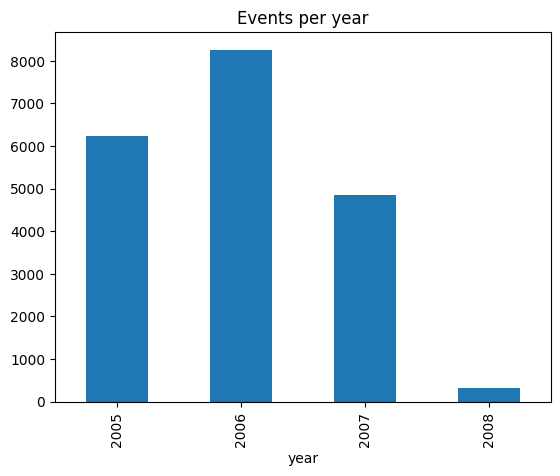

In [25]:
df = df.drop_duplicates()
counts = df.groupby("case:concept:name")["concept:name"].count()
valid_cases = counts[counts >= 2].index
df = df[df["case:concept:name"].isin(valid_cases)]

df = df.sort_values(by=["case:concept:name", "time:timestamp"])
last_events = df.groupby("case:concept:name").tail(1)
completed_cases = last_events[last_events["lifecycle:transition"] == "complete"]["case:concept:name"]
df = df[df["case:concept:name"].isin(completed_cases)]

activity_counts = df["concept:name"].value_counts()
valid_activities = activity_counts[activity_counts > 5].index
df = df[df["concept:name"].isin(valid_activities)]

df["prev"] = df.groupby("case:concept:name")["concept:name"].shift(1)
df = df[df["concept:name"] != df["prev"]]
df.drop(columns=["prev"], inplace=True)

df["case_duration"] = pd.to_datetime(df["case:End date"], errors='coerce') - pd.to_datetime(df["case:Start date"], errors='coerce')
df = df[df["case_duration"].dt.days <= 365]  # maximum 1 year

df["time:timestamp"] = pd.to_datetime(df["time:timestamp"], errors="coerce")
df["case:Start date"] = pd.to_datetime(df["case:Start date"], errors="coerce")
df["case:End date"] = pd.to_datetime(df["case:End date"], errors="coerce")

df["year"] = df["time:timestamp"].dt.year
df["year"].value_counts().sort_index().plot(kind="bar", title="Events per year")

<Axes: >

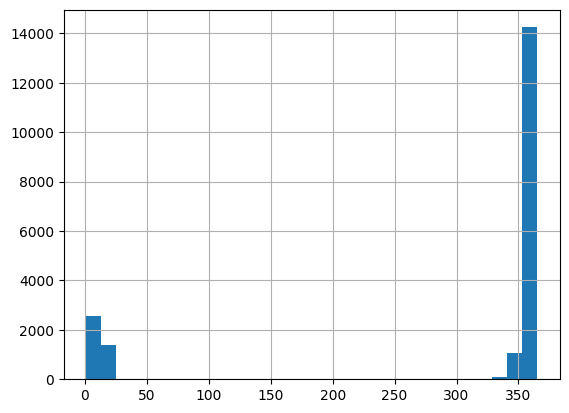

In [26]:
df["year"] = pd.to_datetime(df["time:timestamp"]).dt.year
df = df[df["year"] < 2008]

df["case_duration_days"] = (df["case:End date"] - df["case:Start date"]).dt.days

df["case_duration_days"].hist(bins=30)

In [27]:
# Remove lines with incorrect chronology (end before start)
df = df[df["case_duration_days"] > 0]

# We remove cases that are too long (> 180 days), suspicious
df = df[df["case_duration_days"] <= 180]

In [28]:
# Basic information about dataset
print(f"Total number of events: {len(df)}")
print(f"Number of unique cases: {df['case:concept:name'].nunique()}")

Total number of events: 3952
Number of unique cases: 61


## Visualizing a simple process using Inductive Miner
Inductive Miner works fast on medium logs. But when there are many branches, non-standard routes. It starts to build a too complex network.

In [30]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import sorting

df["time:timestamp"] = pd.to_datetime(df["time:timestamp"]).astype(object)
parameters = {
    "case_id_key": "case:concept:name",
    "activity_key": "concept:name",
    "timestamp_key": "time:timestamp",
    "lifecycle_key": "lifecycle:transition"
}

event_log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG, parameters=parameters)
event_log = sorting.sort_timestamp(event_log)
pm4py.write_xes(event_log, "data/Hospitals_cleaned.xes")
print("The log is saved to the file Hospitals_cleaned.xes")


exporting log, completed traces :: 100%|██████████| 61/61 [00:00<00:00, 333.52it/s]

The log is saved to the file Hospitals_cleaned.xes


In [83]:
# THE FIRST TRY OF SELECTING ONLY TOP-5 ROUTES
# Filtering: leaving only the 10 most frequent routes
from pm4py.algo.filtering.log.variants.variants_filter import filter_variants_top_k
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

log = xes_importer.apply('data/Hospitals_cleaned.xes')
k = int(5)
log_filtered = filter_variants_top_k(log, k=k)
df_filtered = log_converter.apply(log_filtered, variant=log_converter.Variants.TO_DATA_FRAME)

parsing log, completed traces :: 100%|██████████| 61/61 [00:00<00:00, 276.07it/s]


In [84]:
from googletrans import Translator

translator = Translator()
unique_activities = df_filtered['concept:name'].unique()
translated_activities = {}
for activity in unique_activities:
    try:
        translation = translator.translate(activity, src='auto', dest='en')
        translated_activities[activity] = translation.text
    except Exception as e:
        print(f"Error translating '{activity}': {e}")
        translated_activities[activity] = activity  # fallback
df_filtered['concept:name'] = df_filtered['concept:name'].map(translated_activities)
df_filtered.head()

,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,timestamp,...,case:End date:4,case:End date:5,case:Treatment code:6,case:Specialism code:6,case:Start date:6,case:Diagnosis code:6,case:Diagnosis:6,case:Diagnosis Treatment Combination ID:6,case:End date:6,case:Age:5
0,Obstetrics & Gynaecology clinic,1,7,Verlosk.-Gynaec.Short card cost-out,SGNA,Section 2,10107,2005-03-23 00:00:00+00:00,complete,2005-03-23 00:00:00+00:00,...,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
1,Obstetrics & Gynaecology clinic,1,7,Ultrasound - Internal Genitalia,SGEC,Section 2,339486E,2005-03-23 00:00:00+00:00,complete,2005-03-23 00:00:00+00:00,...,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
2,General Lab Clinical Chemistry,1,86,Acquisition of Laboratory Examination,CRLA,Section 4,370000,2005-03-23 00:00:00+00:00,complete,2005-03-23 00:00:00+00:00,...,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
3,General Lab Clinical Chemistry,1,86,Bilirubin -Conjuged,CHE2,Section 4,370401,2005-03-23 00:00:00+00:00,complete,2005-03-23 00:00:00+00:00,...,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN
4,General Lab Clinical Chemistry,1,86,Bilirubin - Total,CHE2,Section 4,370401C,2005-03-23 00:00:00+00:00,complete,2005-03-23 00:00:00+00:00,...,NaT,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN


In [85]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.objects.conversion.process_tree import converter as tree_converter

In [36]:
# 1. Building Process Tree
tree = inductive_miner.apply(df_filtered) # log_filtered

In [37]:
# 2. Convert Process Tree в Petri Net
net, initial_marking, final_marking = tree_converter.apply(tree)

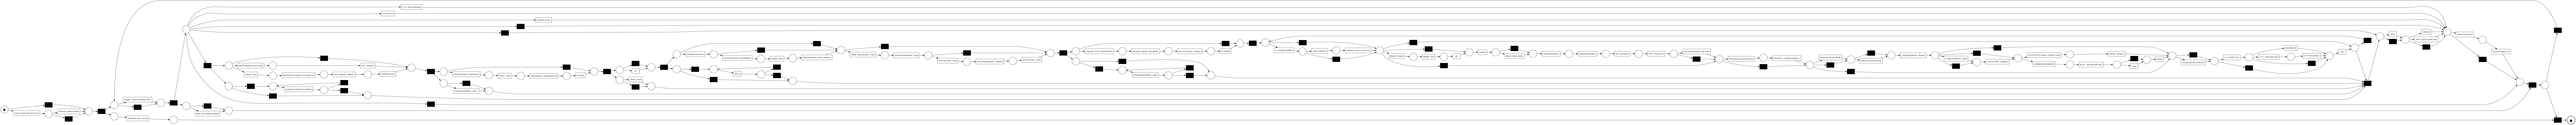

In [38]:
# 3. Visualizing Petri Net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [39]:
# Save to PNG
pn_visualizer.save(gviz, "data/process_model_cleaned.png")  # Save to PNG
# pn_visualizer.save(gviz, "data/process_model_100.png")

''

In [29]:
#!apt-get install graphviz
#!pip install graphviz

zsh:1: command not found: apt-get

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [31]:
# !apt-get update
# !apt-get install -y graphviz

zsh:1: command not found: apt-get


In [32]:
#!pip install graphviz
#!pip install pydot


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/0a/16/984c0cf5073a23154b1f95c9d131b14c9fea83bfadae4ba8fc169daded11/pydot-4.0.0-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


## Criteria for "complex" patients
* A large number of events in one case (long trace).
* Long treatment - the difference between case:Start date and case:End date.
* Many unique activities within one patient.
* Presence of several diagnoses and/or several treatments.
* Patients who have rare procedures.

In [72]:
# 1. Counting the number of events per patient
# trace_lengths = df.groupby("case:concept:name").size().reset_index(name="event_count")

# 2. Counting the number of unique activities per patient
# unique_activities = df.groupby("case:concept:name")["concept:name"].nunique().reset_index(name="unique_activities")

# 3. Calculating the duration of the case
# df["case:Start date"] = pd.to_datetime(df["case:Start date"], errors="coerce")
# df["case:End date"] = pd.to_datetime(df["case:End date"], errors="coerce")
# case_durations = df.groupby("case:concept:name").agg(
#     start_date=("case:Start date", "min"),
#     end_date=("case:End date", "max")
# ).reset_index()
# case_durations["duration_days"] = (case_durations["end_date"] - case_durations["start_date"]).dt.days

# 4. Combining "complexity" into one metric
# complexity_df = trace_lengths \
#     .merge(unique_activities, on="case:concept:name") \
#     .merge(case_durations[["case:concept:name", "duration_days"]], on="case:concept:name")

# 5. Selecting the top-N most difficult patients
#  complexity_df["complexity_score"] = (
#     complexity_df["event_count"] * 0.4 +
#     complexity_df["unique_activities"] * 0.3 +
#     complexity_df["duration_days"].fillna(0) * 0.3
# )

# Selection, for example, the top 100 most difficult patients
# top_cases = complexity_df.sort_values("complexity_score", ascending=False).head(5)["case:concept:name"]

# Filtering the original DataFrame
# df_complex = df[df["case:concept:name"].isin(top_cases)].copy()

In [73]:
# df_complex

,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,case:End date,...,case:End date:6,case:Age:5,timestamp,case_duration_days,case_duration_days:3,case_duration_days:5,case_duration_days:2,case_duration_days:4,case_duration_days:6,case_duration_days:1
45161,Obstetrics & Gynaecology clinic,1,7,Verlosk.-Gynaec.Short card cost-out,SGAL,Section 2,10107,2005-08-24 01:00:00+00:00,complete,2006-01-23 23:45:36+00:00,...,NaT,NaN,2005-08-24 01:00:00+00:00,364.0,364.0,NaN,353.0,NaN,NaN,364.0
45162,Obstetrics & Gynaecology clinic,1,7,1st consultation outpatient,SGAL,Section 2,410100,2005-08-24 01:00:00+00:00,complete,2006-01-23 23:45:36+00:00,...,NaT,NaN,2005-08-24 01:00:00+00:00,364.0,364.0,NaN,353.0,NaN,NaN,364.0
45163,Obstetrics & Gynaecology clinic,1,7,Administrative rate - First Pol,SGAL,Section 2,419100,2005-08-24 01:00:00+00:00,complete,2006-01-23 23:45:36+00:00,...,NaT,NaN,2005-08-24 01:00:00+00:00,364.0,364.0,NaN,353.0,NaN,NaN,364.0
45164,General Lab Clinical Chemistry,1,86,Acquisition of Laboratory Examination,CRLA,Section 4,370000,2005-08-26 01:00:00+00:00,complete,2006-01-23 23:45:36+00:00,...,NaT,NaN,2005-08-26 01:00:00+00:00,364.0,364.0,NaN,353.0,NaN,NaN,364.0
45165,General Lab Clinical Chemistry,1,86,Acquisition of Laboratory Examination,CRLA,Section 4,370000,2005-08-26 01:00:00+00:00,complete,2006-01-23 23:45:36+00:00,...,NaT,NaN,2005-08-26 01:00:00+00:00,364.0,364.0,NaN,353.0,NaN,NaN,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129797,General Lab Clinical Chemistry,1,86,Acquisition of Laboratory Examination,CRLA,Section 4,370000,2008-02-13 00:00:00+00:00,complete,NaT,...,NaT,NaN,2008-02-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129798,General Lab Clinical Chemistry,1,86,hemoglobin photoelectric,HAEM,Section 4,370407.0,2008-02-13 00:00:00+00:00,complete,NaT,...,NaT,NaN,2008-02-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129799,General Lab Clinical Chemistry,1,86,CA-125 MBV HALF,CHE2,Section 4,378619A,2008-02-13 00:00:00+00:00,complete,NaT,...,NaT,NaN,2008-02-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129800,General Lab Clinical Chemistry,1,86,rank,CRLA,Section 4,379999,2008-02-13 00:00:00+00:00,complete,NaT,...,NaT,NaN,2008-02-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# from pm4py.algo.discovery.inductive import algorithm as inductive_miner
# from pm4py.objects.conversion.process_tree import converter as tree_converter

# 1. Building Process Tree
# tree = inductive_miner.apply(df_complex) # log_filtered

# 2. Convert Process Tree в Petri Net
# net, initial_marking, final_marking = tree_converter.apply(tree)

In [75]:
# gviz = pn_visualizer.apply(net, initial_marking, final_marking)
# pn_visualizer.view(gviz)

KeyboardInterrupt: 

In [63]:
# Save to PNG
# pn_visualizer.save(gviz, "data/process_model_20.png")  # Save to PNG
# pn_visualizer.save(gviz, "data/process_model_100.png")

''

In [134]:
# Basic information about dataset
# print(f"Total number of events: {len(df)}")
# print(f"Number of unique cases: {df['case:concept:name'].nunique()}")

Total number of events: 3952
Number of unique cases: 61


In [100]:
# 1. Building Process Tree
# tree = inductive_miner.apply(df)

In [ ]:
# net, initial_marking, final_marking = tree_converter.apply(tree)

# gviz = pn_visualizer.apply(net, initial_marking, final_marking)
# pn_visualizer.view(gviz)

## Heuristiic miner for more 'LIVE' data

In [40]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

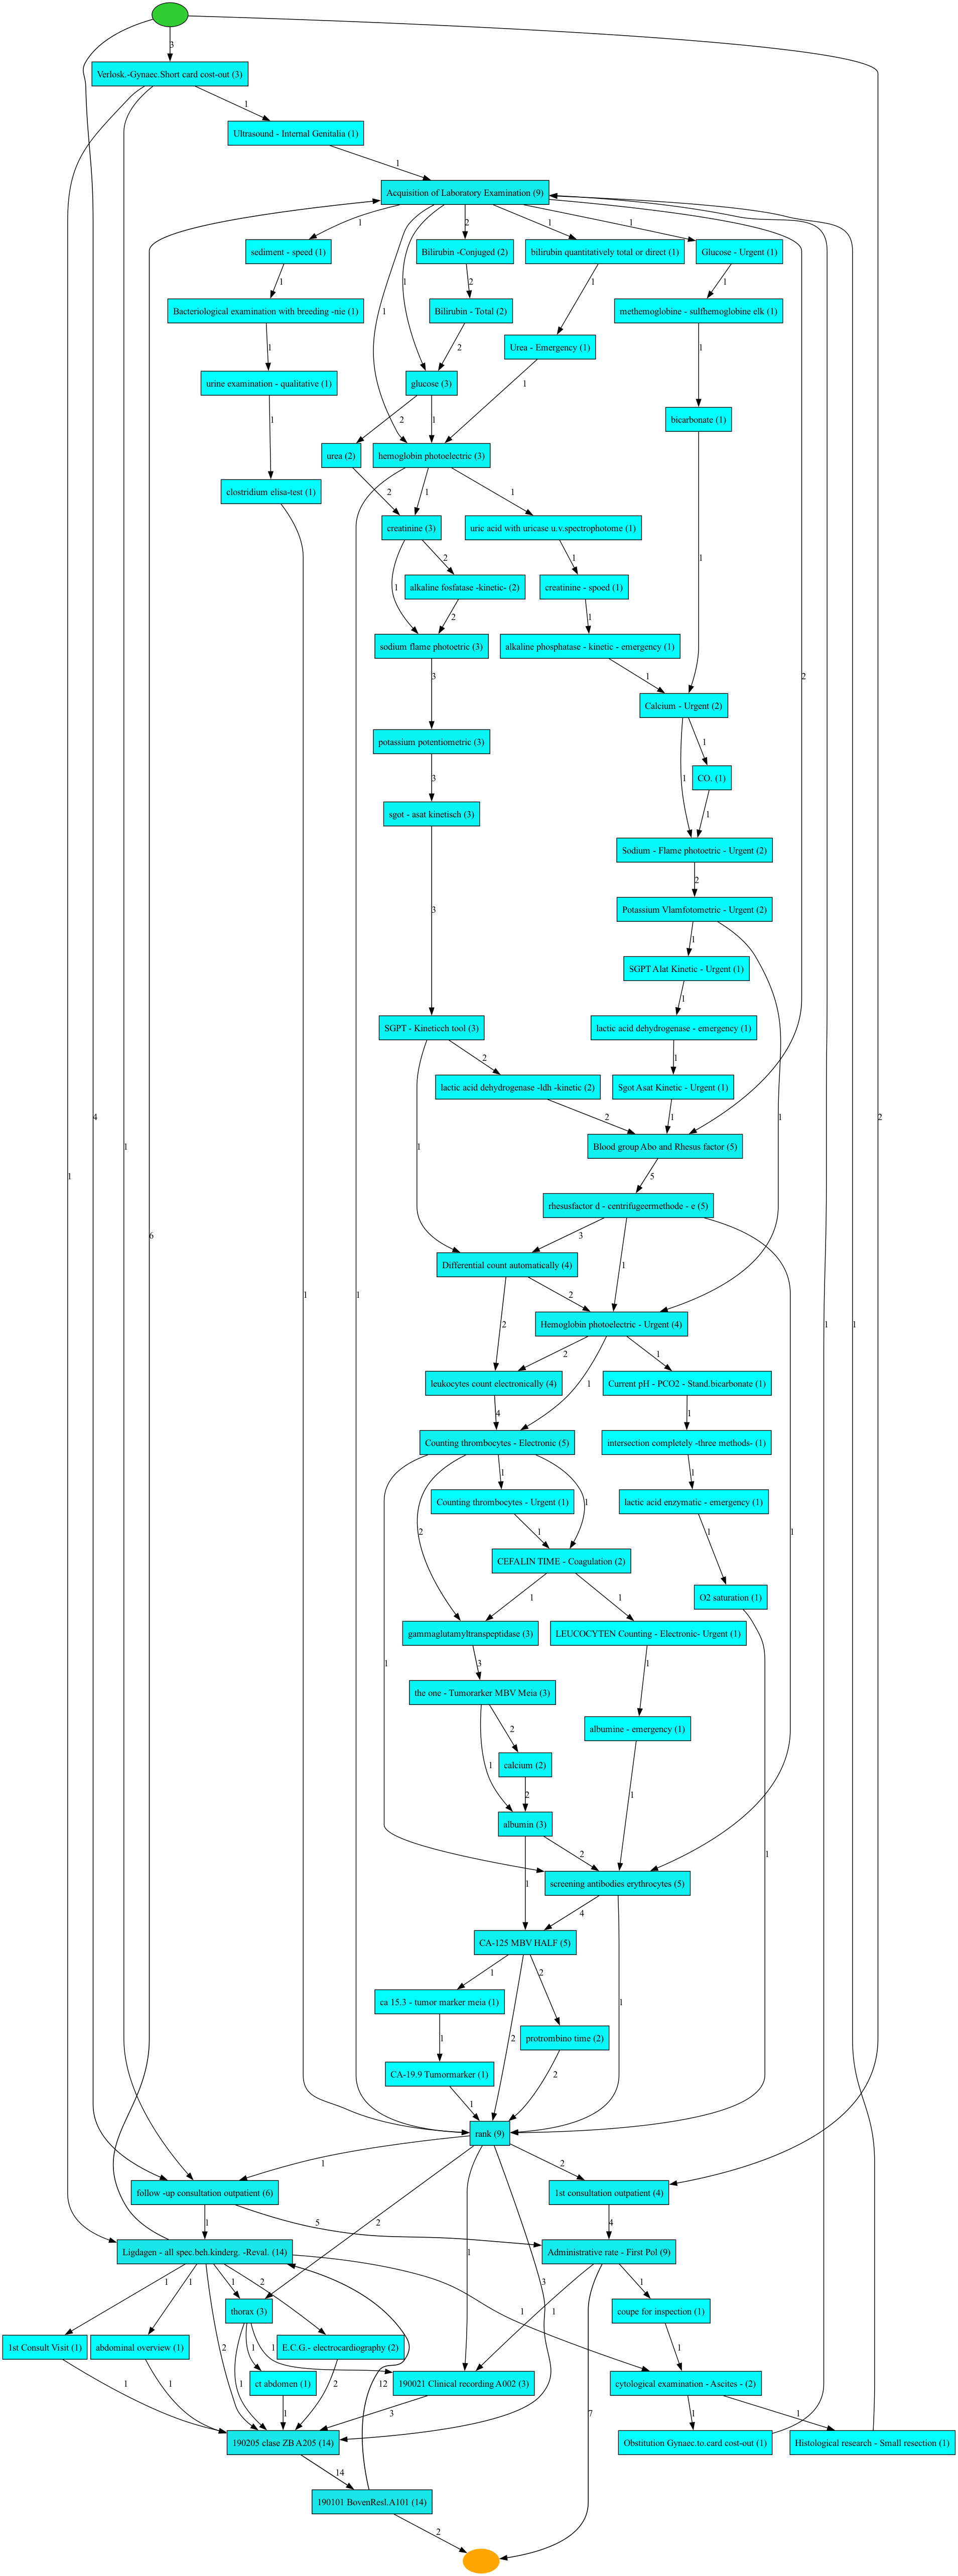

''

In [41]:
heu_net = heuristics_miner.apply_heu(df_filtered)
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)


hn_visualizer.save(gviz, "heuristic_model.png")

### Evaluation: Standard Metrics
We now evaluate the discovered models using fitness, precision, and generalization metrics.

In [126]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator

In [43]:
def evaluate_model(logX, netX, imX, fmX):
    # Fitness
    fitness_result = replay_fitness.apply(logX, netX, imX, fmX)
    # Precision      x
    precision_result = precision_evaluator.apply(logX, netX, imX, fmX)
    # Generalization
    generalization_result = generalization_evaluator.apply(logX, netX, imX, fmX)

    return {
        "fitness": fitness_result.get("averageFitness", None),
        "precision": precision_result,
        "generalization": generalization_result
    }

In [44]:
def evaluate_generalization(logX, netX, imX, fmX):
    # Generalization
    generalization_result = generalization_evaluator.apply(logX, netX, imX, fmX)

    return {
        "generalization": generalization_result
    }

In [45]:
print(evaluate_model(df_filtered, net, initial_marking, final_marking ))

aligning log, completed variants :: 100%|██████████| 5/5 [01:24<00:00, 16.96s/it]
computing precision with alignments, completed variants :: 100%|██████████| 198/198 [12:34<00:00,  3.81s/it]
replaying log with TBR, completed traces :: 100%|██████████| 5/5 [00:00<00:00, 264.17it/s]

{'fitness': 1.0, 'precision': 0.06141275698471271, 'generalization': 0.35153672352676146}


# Phase 2: Context-Aware Variant Analysis
Define variant groups based on clinical attributes (e.g., age group, diagnosis type, urgency).
1. Age Groups: Under 18, 18–65, Over 65
2. Diagnosis Groups: a) Select the top 5 most common diagnoses. b) Combine the rest into the "Other Diagnoses" group.
3. Specialism Groups (optional): a) By specialization: therapy, surgery, oncology, etc. Only if Specialism is actually filled.

In [125]:
# Grouping by Age
def assign_age_group(age):
    if pd.isna(age):
        return 'Unknown'
    elif age <= 18:
        return 'Child'
    elif age <= 65:
        return 'Adult'
    else:
        return 'Senior'

In [127]:
df_by_age = df

In [128]:
df_by_age['age_group'] = df_by_age['case:Age'].apply(assign_age_group)

print("\nGroups by Age:")
print(df_by_age['age_group'].value_counts())


Groups by Age:
age_group
Senior    2161
Adult     1791
Name: count, dtype: int64


In [122]:
df_by_age

,org:group,Number of executions,Specialism code,concept:name,Producer code,Section,Activity code,time:timestamp,lifecycle:transition,case:End date,...,case_duration_days:6,case_duration_days:1,case_duration_days:4,case_duration_days:2,case_duration_days:3,case_duration_days:5,case_duration,year,age_group,diagnosis_group
1464,Obstetrics & Gynaecology clinic,1,7,verlosk.-gynaec. korte kaart kosten-out,SGNA,Section 2,10107,2005-01-10 00:00:00+00:00,complete,2005-01-14 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,4 days 23:31:12,2005,Senior,maligniteit ovarium | tuba
1465,General Lab Clinical Chemistry,1,20,e.c.g. - elektrocardiografie,PLAB,Section 4,330001B,2005-01-10 00:00:00+00:00,complete,2005-01-14 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,4 days 23:31:12,2005,Senior,maligniteit ovarium | tuba
1466,Pathology,1,88,coupe ter inzage,LVPT,Section 4,355111,2005-01-10 00:00:00+00:00,complete,2005-01-14 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,4 days 23:31:12,2005,Senior,maligniteit ovarium | tuba
1467,Pathology,1,88,cito histologisch onderzoek,LVPT,Section 4,359999,2005-01-10 00:00:00+00:00,complete,2005-01-14 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,4 days 23:31:12,2005,Senior,maligniteit ovarium | tuba
1468,General Lab Clinical Chemistry,1,86,aanname laboratoriumonderzoek,CRLA,Section 4,370000,2005-01-10 00:00:00+00:00,complete,2005-01-14 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,4 days 23:31:12,2005,Senior,maligniteit ovarium | tuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141675,General Lab Clinical Chemistry,1,86,kalium potentiometrisch,CHE2,Section 4,370443,2007-12-16 00:00:00+00:00,complete,2007-01-16 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,14 days 23:31:12,2007,Senior,Other Diagnoses
141676,General Lab Clinical Chemistry,1,86,ordertarief,CRLA,Section 4,379999,2007-12-16 00:00:00+00:00,complete,2007-01-16 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,14 days 23:31:12,2007,Senior,Other Diagnoses
141677,Nursing ward,1,7,190205 klasse 3b a205,H5ZU,Section 2,613000,2007-12-16 00:00:00+00:00,complete,2007-01-16 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,14 days 23:31:12,2007,Senior,Other Diagnoses
145510,Obstetrics & Gynaecology clinic,1,7,1e consult poliklinisch,SGNA,Section 2,410100,2007-12-03 00:00:00+00:00,complete,2007-01-04 23:45:36+00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,1 days 23:31:12,2007,Senior,Other Diagnoses


In [129]:
df_by_age["time:timestamp"] = pd.to_datetime(df_by_age["time:timestamp"], errors="coerce")
df_by_age["case:Start date"] = pd.to_datetime(df_by_age["case:Start date"], errors="coerce")
df_by_age["case:End date"] = pd.to_datetime(df_by_age["case:End date"], errors="coerce")

In [130]:
df_by_diagnosis = df

In [131]:
# --- 2. Diagnosis Groups ---

# TOP-5 diagnosis
top5_diagnoses = df['case:Diagnosis'].value_counts().head(5).index.tolist()

In [132]:
def assign_diagnosis_group(diagnosis):
    if pd.isna(diagnosis):
        return 'Unknown'
    if diagnosis in top5_diagnoses:
        return diagnosis
    else:
        return 'Other Diagnoses'

In [133]:
df_by_diagnosis['diagnosis_group'] = df_by_diagnosis['case:Diagnosis'].apply(assign_diagnosis_group)

print("\nGroups by Diagnosis:")
print(df_by_diagnosis['diagnosis_group'].value_counts())


Groups by Diagnosis:
diagnosis_group
Other Diagnoses                              1621
maligniteit cervix                            684
maligniteit ovarium | tuba                    665
Recidieven corpus maligniteit uteri (nno)     370
maligniteit endometrium                       322
Adenocarcinoom corpus uteri (nno)             290
Name: count, dtype: int64


In [134]:
df_by_diagnosis["time:timestamp"] = pd.to_datetime(df_by_diagnosis["time:timestamp"], errors="coerce")
df_by_diagnosis["case:Start date"] = pd.to_datetime(df_by_diagnosis["case:Start date"], errors="coerce")
df_by_diagnosis["case:End date"] = pd.to_datetime(df_by_diagnosis["case:End date"], errors="coerce")

Generate multiple event logs by filtering cases according to variant definitions.

In [135]:
from pm4py.objects.log.util import sorting
import os

In [137]:
def save_logs_by_column(df2, column_name, folder_path):
    os.makedirs(folder_path, exist_ok=True)
    unique_groups = df2[column_name].unique()

    for group in unique_groups:
        group_df = df2[df2[column_name] == group]
        if not group_df.empty:
            # Formatting to timestamps to the right format IN ADVANCE
            if "time:timestamp" in group_df.columns:
                group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
                group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)


            # 2. Converting again to EventLog
            parameters = {
                "case_id_key": "case:concept:name",
                "activity_key": "concept:name",
                "timestamp_key": "time:timestamp",
                "lifecycle_key": "lifecycle:transition"
            }
            group_log = log_converter.apply(group_df, variant=log_converter.Variants.TO_EVENT_LOG, parameters=parameters)

            # 3. Sorting by time
            group_log = sorting.sort_timestamp(group_log)

            # 4. Saving
            filename = f"{folder_path}/{column_name.replace(':', '_')}_{str(group).replace(' ', '_').replace('/', '_')}.xes"
            pm4py.write_xes(group_log, filename)
            print(f"Saved: {filename}")


In [138]:
# Creating directories
os.makedirs('data/age_group_logs_2', exist_ok=True)
os.makedirs('data/diagnosis_group_logs_2', exist_ok=True)

In [139]:
save_logs_by_column(df_by_age, 'age_group', 'data/age_group_logs_2')
save_logs_by_column(df_by_diagnosis, 'diagnosis_group', 'data/diagnosis_group_logs_2')

print("\nAll groups are saved!")

/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(object)
exporting log, completed traces :: 100%|██████████| 29/29 [00:00<00:00, 258.

Saved: data/age_group_logs_2/age_group_Senior.xes


exporting log, completed traces :: 100%|██████████| 32/32 [00:00<00:00, 329.48it/s]
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(

Saved: data/age_group_logs_2/age_group_Adult.xes


exporting log, completed traces :: 100%|██████████| 9/9 [00:00<00:00, 256.72it/s]
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(ob

Saved: data/diagnosis_group_logs_2/diagnosis_group_maligniteit_ovarium_|_tuba.xes


exporting log, completed traces :: 100%|██████████| 9/9 [00:00<00:00, 245.35it/s]
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(ob

Saved: data/diagnosis_group_logs_2/diagnosis_group_maligniteit_cervix.xes


exporting log, completed traces :: 100%|██████████| 8/8 [00:00<00:00, 451.80it/s]
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(ob

Saved: data/diagnosis_group_logs_2/diagnosis_group_maligniteit_endometrium.xes


exporting log, completed traces :: 100%|██████████| 30/30 [00:00<00:00, 358.19it/s]
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(

Saved: data/diagnosis_group_logs_2/diagnosis_group_Other_Diagnoses.xes


exporting log, completed traces :: 100%|██████████| 4/4 [00:00<00:00, 201.85it/s]
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = pd.to_datetime(group_df["time:timestamp"]).apply(lambda x: x.to_pydatetime())
/var/folders/1j/0m1j_8nx2k578rqnk1ft_5pc0000gn/T/ipykernel_69861/2662283687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_df["time:timestamp"] = group_df["time:timestamp"].astype(ob

Saved: data/diagnosis_group_logs_2/diagnosis_group_Recidieven_corpus_maligniteit_uteri_(nno).xes


exporting log, completed traces :: 100%|██████████| 1/1 [00:00<00:00, 68.15it/s]

Saved: data/diagnosis_group_logs_2/diagnosis_group_Adenocarcinoom_corpus_uteri_(nno).xes

All groups are saved!


Rediscover models per variant group.

In [140]:
def rediscover_and_save_models(xes_folder, output_folder, visual_format="png"):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(xes_folder):
        if filename.endswith(".xes"):
            filepath = os.path.join(xes_folder, filename)
            log_by_variant = xes_importer.apply(filepath)

            tree = inductive_miner.apply(log_by_variant)
            net, initial_marking, final_marking = tree_converter.apply(tree)
          
            gviz = pn_visualizer.apply(net, initial_marking, final_marking)
            out_path = os.path.join(output_folder, filename.replace(".xes", f".{visual_format}"))
            pn_visualizer.save(gviz, out_path)
            print(f"Model is saved: {out_path}")


In [141]:
rediscover_and_save_models("data/diagnosis_group_logs_2", "models/diagnosis_group_logs_2")

parsing log, completed traces :: 100%|██████████| 4/4 [00:00<00:00, 187.00it/s]


Model is saved: models/diagnosis_group_logs_2/diagnosis_group_Recidieven_corpus_maligniteit_uteri_(nno).png


parsing log, completed traces :: 100%|██████████| 1/1 [00:00<00:00, 61.57it/s]


Model is saved: models/diagnosis_group_logs_2/diagnosis_group_Adenocarcinoom_corpus_uteri_(nno).png


parsing log, completed traces :: 100%|██████████| 9/9 [00:00<00:00, 245.59it/s]


Model is saved: models/diagnosis_group_logs_2/diagnosis_group_maligniteit_ovarium_|_tuba.png


parsing log, completed traces :: 100%|██████████| 8/8 [00:00<00:00, 432.65it/s]


Model is saved: models/diagnosis_group_logs_2/diagnosis_group_maligniteit_endometrium.png


parsing log, completed traces :: 100%|██████████| 9/9 [00:00<00:00, 226.53it/s]
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.968206 to fit


Model is saved: models/diagnosis_group_logs_2/diagnosis_group_maligniteit_cervix.png


parsing log, completed traces :: 100%|██████████| 30/30 [00:00<00:00, 334.35it/s]
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.768637 to fit


Model is saved: models/diagnosis_group_logs_2/diagnosis_group_Other_Diagnoses.png


In [142]:
rediscover_and_save_models("data/age_group_logs_2", "models/age_group_models_2")

parsing log, completed traces :: 100%|██████████| 32/32 [00:00<00:00, 316.75it/s]
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.770463 to fit


Model is saved: models/age_group_models_2/age_group_Adult.png


parsing log, completed traces :: 100%|██████████| 29/29 [00:00<00:00, 236.97it/s]
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.727025 to fit


Model is saved: models/age_group_models_2/age_group_Senior.png


Compare structural differences and performance across variant-specific models.

In [144]:
def compare_models_by_group(xes_folder):
    results = []
    for filename in os.listdir(xes_folder):
        if filename.endswith(".xes"):
            filepath = os.path.join(xes_folder, filename)
            log_X = xes_importer.apply(filepath)
            tree_X = inductive_miner.apply(log_X)
            net_X, im_X, fm_X = tree_converter.apply(tree_X)
            metrics = evaluate_generalization(log_X, net_X, im_X, fm_X)
            results.append({
                "group": filename.replace(".xes", ""),
                **metrics
            })
    return pd.DataFrame(results)

In [111]:
age_group_metrics = compare_models_by_group("data/age_group_logs_2")

print("\n=== Age Group Evaluation ===")
print(age_group_metrics)

replaying log with TBR, completed traces :: 100%|██████████| 28/28 [00:52<00:00,  1.86s/it]


=== Age Group Evaluation ===
              group  generalization
0   age_group_Adult        0.678943
1  age_group_Senior        0.717888


In [112]:
diagnosis_group_metrics = compare_models_by_group("data/diagnosis_group_logs_2")
print("\n=== Diagnosis Group Evaluation ===")
print(diagnosis_group_metrics)

replaying log with TBR, completed traces :: 100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


=== Diagnosis Group Evaluation ===
                                               group  generalization
0  diagnosis_group_Recidieven_corpus_maligniteit_...        0.476041
1  diagnosis_group_Adenocarcinoom_corpus_uteri_(nno)        0.320622
2         diagnosis_group_maligniteit_ovarium_|_tuba        0.578776
3            diagnosis_group_maligniteit_endometrium        0.490717
4                 diagnosis_group_maligniteit_cervix        0.630913
5                    diagnosis_group_Other_Diagnoses        0.659427


# Custom Weighted Generalization
General idea: simulated traces that are similar to more important (frequent) real traces are considered more significant in the generalization evaluation.

Applying the custom metric to baseline and variant-specific models.

In [158]:
import os
from collections import Counter
import pandas as pd
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.objects.log.obj import EventLog, Trace, Event
from pm4py.algo.simulation.playout.petri_net import algorithm as simulator
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

def is_unseen(variant, known_variants):
    return all(not variant.startswith(kv) and not kv.startswith(variant) for kv in known_variants)

def compute_weighted_generalization(model_net, im, fm, training_log, group_name, num_sim_traces=1000):
    """
    Custom generalization metric that accounts for:
    - variant frequency (importance),
    - domain context (age or diagnosis group),
    - group coverage (log size share).
    """

    age_weights = {
        "age_group_Adult": 1.0,
        "age_group_Senior": 1.0,
        "age_group_Unknown": 0.5
    }

    diagnosis_weights = {
        "diagnosis_group_Recidieven_corpus_maligniteit_endometrium": 1.5,
        "diagnosis_group_Recidieven_corpus_maligniteit_...": 1.5,
        "diagnosis_group_Adenocarcinoom_corpus_uteri_(nno)": 1.5,
        "diagnosis_group_maligniteit_ovarium_|_tuba": 1.5,
        "diagnosis_group_maligniteit_endometrium": 1.5,
        "diagnosis_group_maligniteit_cervix": 1.5,
        "diagnosis_group_Other_Diagnoses": 1.0,
        "diagnosis_group_Unknown": 0.5
    }

    if "age_group" in group_name:
        context_weight = age_weights.get(group_name, 1.0)
    elif "diagnosis_group" in group_name:
        context_weight = diagnosis_weights.get(group_name, 1.0)
    else:
        context_weight = 1.0

    parameters = {"no_traces": num_sim_traces}
    simulated_traces = simulator.apply(model_net, im, fm, parameters=parameters)

    def get_variant(trace): return ">".join([e["concept:name"] for e in trace])
    original_variants = [get_variant(trace) for trace in training_log]
    variant_counter = Counter(original_variants)
    total_variants = sum(variant_counter.values())
    variant_weights = {variant: freq / total_variants for variant, freq in variant_counter.items()}

    simulated_variants = [get_variant(trace) for trace in simulated_traces]
    unseen_variants = [v for v in simulated_variants if is_unseen(v, variant_counter.keys())]
    
    if len(unseen_variants) == 0:
        return 0.0

    unseen_log = EventLog()
    for variant_str in unseen_variants:
        trace = Trace()
        for activity in variant_str.split(">"):
            trace.append(Event({"concept:name": activity}))
        unseen_log.append(trace)

    replay_results = token_replay.apply(unseen_log, model_net, im, fm)
    fitness_values = []
    weights = []

    for i, res in enumerate(replay_results):
        trace_fitness = res.get("trace_fitness", 0)
        sim_variant = unseen_variants[i]

        best_match_weight = 0
        for real_variant, weight in variant_weights.items():
            if sim_variant.startswith(real_variant) or real_variant.startswith(sim_variant):
                best_match_weight = max(best_match_weight, weight)

        weighted_fitness = trace_fitness * best_match_weight * context_weight
        fitness_values.append(weighted_fitness)
        weights.append(best_match_weight * context_weight)

    if not weights or sum(weights) == 0:
        return 0.0

    return sum(fitness_values) / sum(weights)

def compare_models_by_group_with_weighted_generalization(xes_folder, training_log=None):
    """
    Discover and compare generalization metrics for each group based on the XES files in the given folder.
    """
    results = []
    for filename in os.listdir(xes_folder):
        if filename.endswith(".xes"):
            filepath = os.path.join(xes_folder, filename)
            log = xes_importer.apply(filepath)

            group_name_inferred = filename.replace(".xes", "")
            if training_log is None:
                training_log = log  # fallback

            tree = inductive_miner.apply(training_log)
            net, im, fm = tree_converter.apply(tree)

            standard_generalization = generalization_evaluator.apply(training_log, net, im, fm)
            weighted_gen = compute_weighted_generalization(net, im, fm, training_log, group_name_inferred)

            results.append({
                "group": group_name_inferred,
                "generalization": round(standard_generalization, 3),
                "weighted_generalization": round(weighted_gen, 3)
            })

    return pd.DataFrame(results)


In [161]:
df_diag = compare_models_by_group_with_weighted_generalization("data/diagnosis_group_logs_2")
df_diag

replaying log with TBR, completed traces :: 100%|██████████| 4/4 [00:00<00:00, 13.28it/s]


KeyboardInterrupt: 

In [68]:
df_metrics = pd.concat([df_age, df_diag], ignore_index=True)

E. Phase 4: Analysis and Visualization
5. График: completeness vs generalization
Если ты посчитаешь log completeness (например, долю вариантов в этом сабсете по сравнению с полным логом), можно сделать:

In [69]:
# Completeness:
from pm4py.objects.log.importer.xes import importer as xes_importer

def add_completeness(df_param, base_log_path="data/Hospital_log.xes", xes_folder="data/age_group_logs"):
    full_log = xes_importer.apply(base_log_path)
    total_traces = len(full_log)

    completeness_scores = []
    for group in df_param["group"]:
        path = os.path.join(xes_folder, f"{group}.xes")
        if os.path.exists(path):
            group_log = xes_importer.apply(path)
            completeness_scores.append(len(group_log) / total_traces)
        else:
            completeness_scores.append(0.0)

    df_param["completeness"] = completeness_scores
    return df_param

df_metrics = add_completeness(df_metrics, xes_folder="data/age_group_logs")  # или diagnosis_group_logs


parsing log, completed traces :: 100%|██████████| 46/46 [00:00<00:00, 4858.92it/s]


In [52]:
df_metrics.head()

,group,weighted_generalization,generalization,completeness
0,age_group_Adult,0.998,0.581276,0.053368
1,age_group_Unknown,0.997,0.581276,0.091864
2,age_group_Senior,0.998,0.581276,0.040245
3,diagnosis_group_Mucineus_adenoca._ovarium_st_IIIc,0.999,0.581276,0.000000
4,diagnosis_group_maligniteit_vulva,0.999,0.581276,0.000000


2. Визуализация распределения вариантов (Variant Statistics)

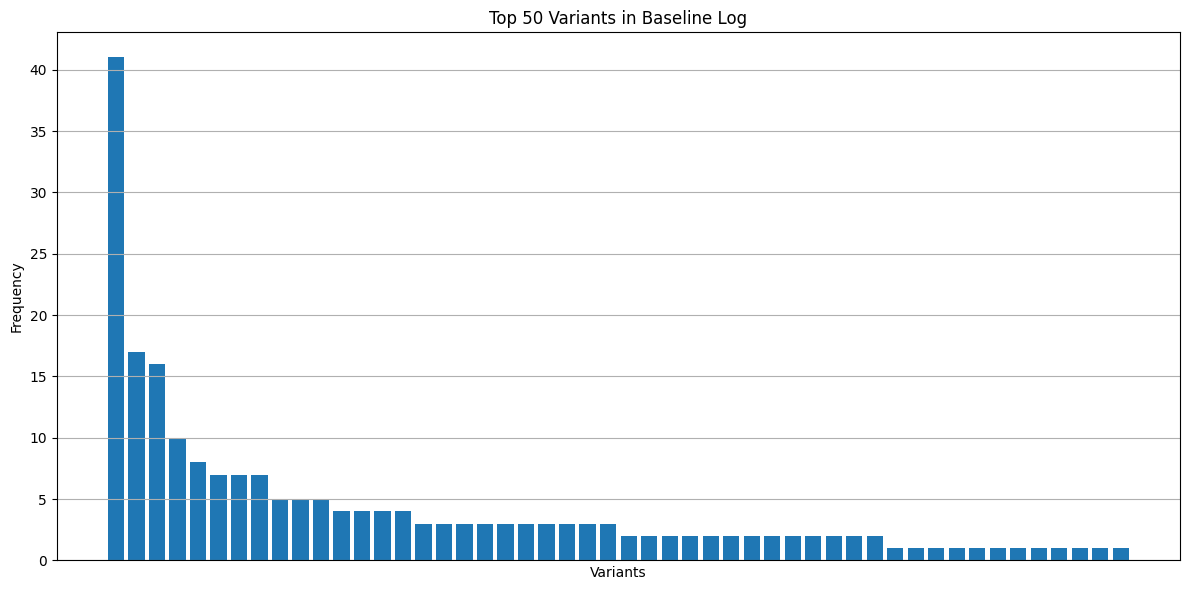

In [53]:
from pm4py.statistics.traces.generic.log import case_statistics
import matplotlib.pyplot as plt

def plot_variant_statistics(log, title="Variant Frequency Distribution"):
    variants_count = case_statistics.get_variant_statistics(log)
    variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
    variants = [v['variant'] for v in variants_count]
    counts = [v['count'] for v in variants_count]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(variants)), counts)
    plt.xticks([], [])  # Too many variants to show on x-axis
    plt.title(title)
    plt.xlabel("Variants")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_variant_statistics(log_filtered, "Top 50 Variants in Baseline Log")


3. Визуализация Directly-Follows Graph (DFG)

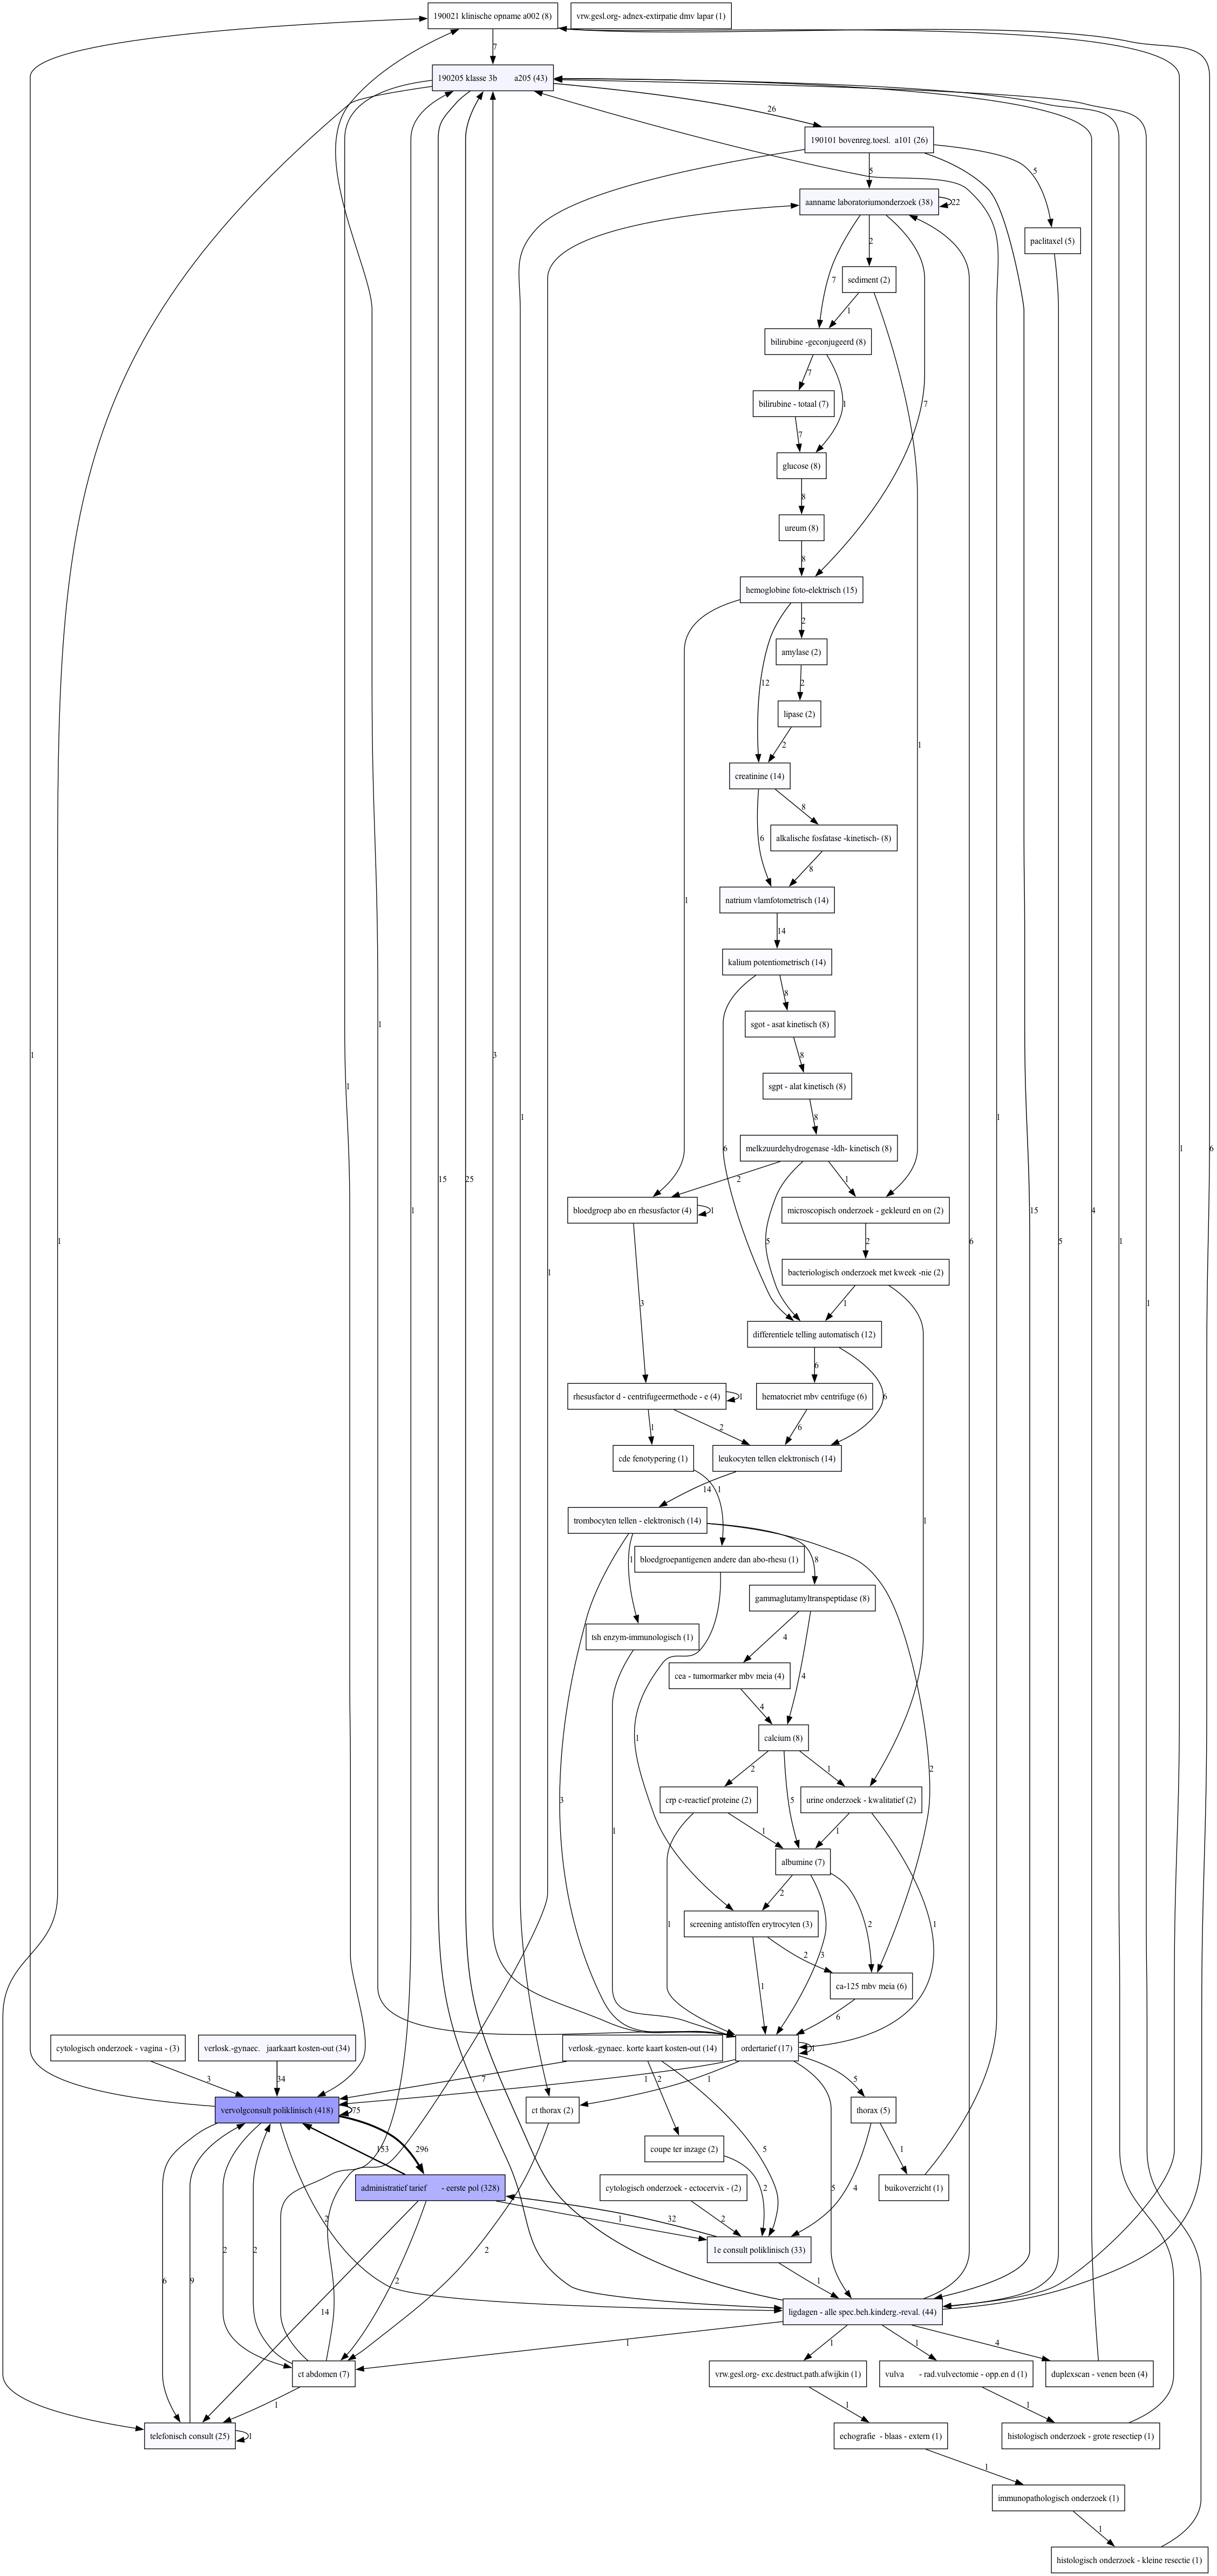

In [37]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer

def show_dfg(log, title="Directly-Follows Graph"):
    dfg = dfg_discovery.apply(log)
    parameters = {dfg_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
    gviz = dfg_visualizer.apply(dfg, log=log, variant=dfg_visualizer.Variants.FREQUENCY, parameters=parameters)
    dfg_visualizer.view(gviz)

show_dfg(log_filtered, "DFG of Top-50 Variants")

In [54]:
def plot_completeness_vs_generalization(_df_metrics):
    plt.figure(figsize=(8, 5))
    plt.scatter(_df_metrics['completeness'], _df_metrics['generalization'], c='blue', label='Standard Gen.')
    plt.scatter(_df_metrics['completeness'], _df_metrics['weighted_generalization'], c='red', label='Weighted Gen.')
    plt.xlabel("Log Completeness")
    plt.ylabel("Generalization")
    plt.title("Completeness vs. Generalization")
    plt.legend()
    plt.grid(True)
    plt.show()

In [55]:
from pm4py.statistics.traces.generic.log import case_statistics

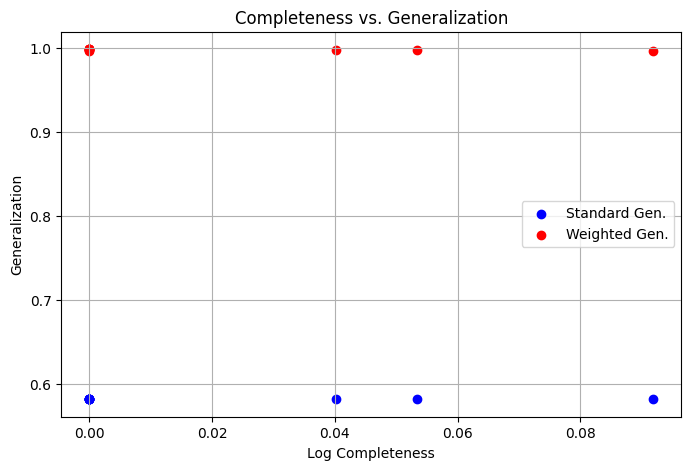

In [56]:
plot_completeness_vs_generalization(df_metrics)

## F. Phase 5: Conclusions

F. Phase 5: Conclusions
Variation in Care Processes Across Patient Groups:

Rediscovered process models for different age and diagnosis groups showed clear structural differences. For example, senior patients tend to have longer and more complex care pathways, while younger groups follow more streamlined routines.

Diagnosis-based grouping revealed that certain diagnoses (e.g., cancer types) have highly specialized and standardized sequences, while others (e.g., “Other Diagnoses”) show greater variability and potential deviation from typical flows.

Impact of Completeness and Context on Generalization:

Standard generalization scores were lower for groups with fewer cases (lower completeness), indicating underfitting or lack of behavioral diversity.

Weighted generalization helped emphasize trace importance, showing improved generalization quality especially in dominant, clinically relevant pathways.

Plots of completeness vs generalization demonstrated a positive correlation: more complete logs generally produce models that generalize better to new simulated behavior.

Practical Recommendations for Hospital Process Improvement
Focus on high-variance groups (e.g., adult or mixed-diagnosis patients) to identify where treatment procedures deviate. This could indicate inconsistencies in care or documentation.

Streamline complex paths for senior patients where possible to reduce resource strain and improve continuity of care.

Use CEKG or context-aware modeling in practice to monitor whether new patient cases deviate from expected pathways in real time.

Target improvement efforts on low-completeness logs by improving data collection or ensuring more consistent recording across departments.